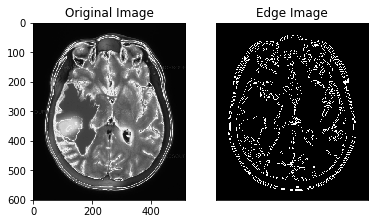

In [3]:
#for more visit : https://docs.opencv.org/3.4.3/da/d22/tutorial_py_canny.html
import numpy as np
import cv2 as cv
import imutils
from matplotlib import pyplot as plt

img = cv.imread('images/brain.jpg', 0)
img = imutils.resize(img, height = 600)

#it's good to first grayscale the image and then apply gaussian blur then do edge detectionm see url abpve for this
gray = cv.GaussianBlur(img, (5, 5), 0)
edges = cv.Canny(gray,75,200)

#-----segmentation stuff--------

# initialize the list of threshold methods
methods = [
    #THRESH_BINARY will segment the image to be black with a white background
	("THRESH_BINARY", cv.THRESH_BINARY),
    #THRESH_BINARY_INV will segment an image to be white with black back
	("THRESH_BINARY_INV", cv.THRESH_BINARY_INV),
    #THRESH_TRUNC will leaves the pixel intensities as they are if the source pixel is not greater than the supplied threshold.
	("THRESH_TRUNC", cv.THRESH_TRUNC),
    #THRESH_TOZERO which sets the source pixel to zero if the source pixel is not greater than the supplied threshold:
	("THRESH_TOZERO", cv.THRESH_TOZERO),
    #THRESH_TOZERO_INV invert of above
	("THRESH_TOZERO_INV", cv.THRESH_TOZERO_INV)]

# loop over the threshold methods
for (threshName, threshMethod) in methods:
	# threshold the image and show it
	(T, thresh) = cv.threshold(gray, 128, 255, threshMethod)
	cv.imshow(threshName, thresh)
	cv.waitKey(0)
    
    
#-------matplotlib---------

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
#plt.xticks([]), plt.yticks([]) -->if want to remove the graphical repr

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])

plt.show()